In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
df = pd.read_excel(r'../data/raw/Incapacidades_Empresa.xlsx',
                       na_values=['N/A', 'NA', 'n.a.', 'nan', 'NAN', 'null', ''])

# Analisis y tratamiento inicial

In [59]:
# ajuste de nombre de columnas
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('-', '_').str.replace('__','_').str.replace('/n','').str.replace('\n','').str.lower().str.replace('__','_')
df.columns

Index(['incapacidad', 'c.c_colaborador', 'fecha_de_ingreso_eps', 'eps', 'ips',
       'arl', 'fondo_de_pensiones', 'salario_colaborador', 'incapacidad_dias',
       'incapacidad_fecha_de_inicio', 'incapacidad_diagnóstico',
       'clasificación_incapacidad', 'incapacidad_ips_atención',
       'incapacidad_origen', 'incapacidad_tipo_de_prestación_economica',
       'incapacidad_tipo_de_generación', 'incapacidad_modalidad_de_prestación',
       'alerta_certificado_invalido', 'alerta_número_de_certificado_repetido',
       'alerta_posible_prórroga', 'alerta_posible_accidente_de_trabajo',
       'alerta_empleado_en_periodo_de_carencia', 'alerta_ubicación_duidosa',
       'alerta_abuso_de_derecho', 'alerta_ter_inconsistente'],
      dtype='object')

In [60]:
print(f"cantidad de filas: {df.shape[0]}")
print(f"cantidad de columnas: {df.shape[1]}")
print(df.dtypes)

cantidad de filas: 5580
cantidad de columnas: 25
incapacidad                                        float64
c.c_colaborador                                      int64
fecha_de_ingreso_eps                        datetime64[ns]
eps                                                 object
ips                                                 object
arl                                                 object
fondo_de_pensiones                                  object
salario_colaborador                                float64
incapacidad_dias                                     int64
incapacidad_fecha_de_inicio                 datetime64[ns]
incapacidad_diagnóstico                             object
clasificación_incapacidad                           object
incapacidad_ips_atención                           float64
incapacidad_origen                                  object
incapacidad_tipo_de_prestación_economica           float64
incapacidad_tipo_de_generación                      object
incapac

In [61]:
variables_categoricas = df.select_dtypes(include=['object']).columns.tolist()
variables_numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Limpieza de datos

In [62]:
df = df.replace(['N/A', 'nan', 'NAN'], np.nan)



## Variables Categoricas

In [63]:
# analizar las categorias de las variables
for var in variables_categoricas:
    print(f"Cantidad de categorias de {var}: {df[var].nunique()}")
    print(f"Categorias de {var}: {df[var].value_counts()}")
    print("*" * 50)

Cantidad de categorias de eps: 26
Categorias de eps: eps
NUEVA EPS                                                1375
SALUD TOTAL                                              1131
SANITAS                                                   727
FAMISANAR                                                 556
COMPENSAR                                                 390
SURA                                                      322
SOS OCCIDENTAL                                            258
COMFENALCO VALLE                                          194
COOSALUD                                                  152
MUTUAL SER                                                126
CAPITAL SALUD                                             110
EMSSANAR                                                   84
ASMET SALUD                                                51
CAJACOPI ATLANTICO                                         32
ALIANSALUD                                                 24
ALIANZA MEDEL

In [64]:
import numpy as np

# Función corregida para binarizar
def binarizar(x):
    if x == 'X':
        return 1
    elif pd.isna(x):  # Esta es la forma correcta de detectar NaN
        return 0
    else:
        return x

# Aplicar la función columna por columna
for var in variables_categoricas:
    df[var] = df[var].map(binarizar)

df

,incapacidad,c.c_colaborador,fecha_de_ingreso_eps,eps,ips,arl,fondo_de_pensiones,salario_colaborador,incapacidad_dias,incapacidad_fecha_de_inicio,...,incapacidad_tipo_de_generación,incapacidad_modalidad_de_prestación,alerta_certificado_invalido,alerta_número_de_certificado_repetido,alerta_posible_prórroga,alerta_posible_accidente_de_trabajo,alerta_empleado_en_periodo_de_carencia,alerta_ubicación_duidosa,alerta_abuso_de_derecho,alerta_ter_inconsistente
0,NaN,1,2017-11-01,COMFENALCO VALLE,IPS RIO CAUCA SQ,ARL SURA,PORVENIR,160000.0,1,2022-01-02,...,DIARREA Y GASTROENTERITIS DE PRESUNTO ORIGEN I...,NaN,1,0,0,1,1,NaN,NaN,1
1,NaN,2,2015-11-24,SURA,IPS COLSUBSIDIO NUESTRO BOGOTA,ARL SURA,PROTECCION,672000.0,2,2022-01-02,...,"AMIGDALITIS AGUDA, NO ESPECIFICADA",NaN,1,0,1,1,1,NaN,NaN,0
2,NaN,3,2020-06-01,MUTUAL SER,CONGREGACION DE HNAS FRANCISCANAS,ARL SURA,PORVENIR,423500.0,5,2022-01-03,...,ESGUINCES Y TORCEDURAS DEL TOBILLO,NaN,0,0,0,0,0,NaN,NaN,1
3,NaN,4,2003-11-01,COOSALUD,MAURO MIGUEL RIVERA,ARL SURA,PROTECCION,160000.0,15,2022-01-05,...,"SUPERVISION DE EMBARAZO DE ALTO RIESGO, SIN OT...",NaN,1,0,0,1,0,NaN,NaN,0
4,NaN,5,2016-04-01,SURA,MASMEDICAL,ARL SURA,COLPENSIONES,160000.0,1,2022-01-03,...,TRAUMATISMOS MULTIPLES NO ESPECIFICADOS,NaN,0,0,1,0,1,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5575,NaN,1817,NaT,SURA,COLSUBSIDIO,COLSANITAS,0,1242235.0,2,2024-03-10,...,"AMIGDALITIS AGUDA, NO ESPECIFICADA",NaN,1,0,0,1,1,NaN,NaN,0
5576,NaN,543,NaT,FAMISANAR,HOME MEDICAL CARE SAS,COLSANITAS,COLPENSIONES,423500.0,3,2024-03-11,...,ADENOMEGALIA LOCALIZADA,NaN,1,0,0,0,1,NaN,NaN,1
5577,NaN,1727,NaT,FAMISANAR,CAFAM,COLSANITAS,0,423500.0,2,2024-03-12,...,RINOFARINGITIS AGUDA,NaN,1,0,1,1,1,NaN,NaN,0
5578,NaN,1818,NaT,FAMISANAR,ESE HOSPITAL DEPARTAMENTAL NUESTRA SEÑORA DE L...,COLSANITAS,0,423500.0,2,2024-03-12,...,LUMBAGO CON CIATICA,NaN,1,0,0,0,1,NaN,NaN,1


## variables numericas

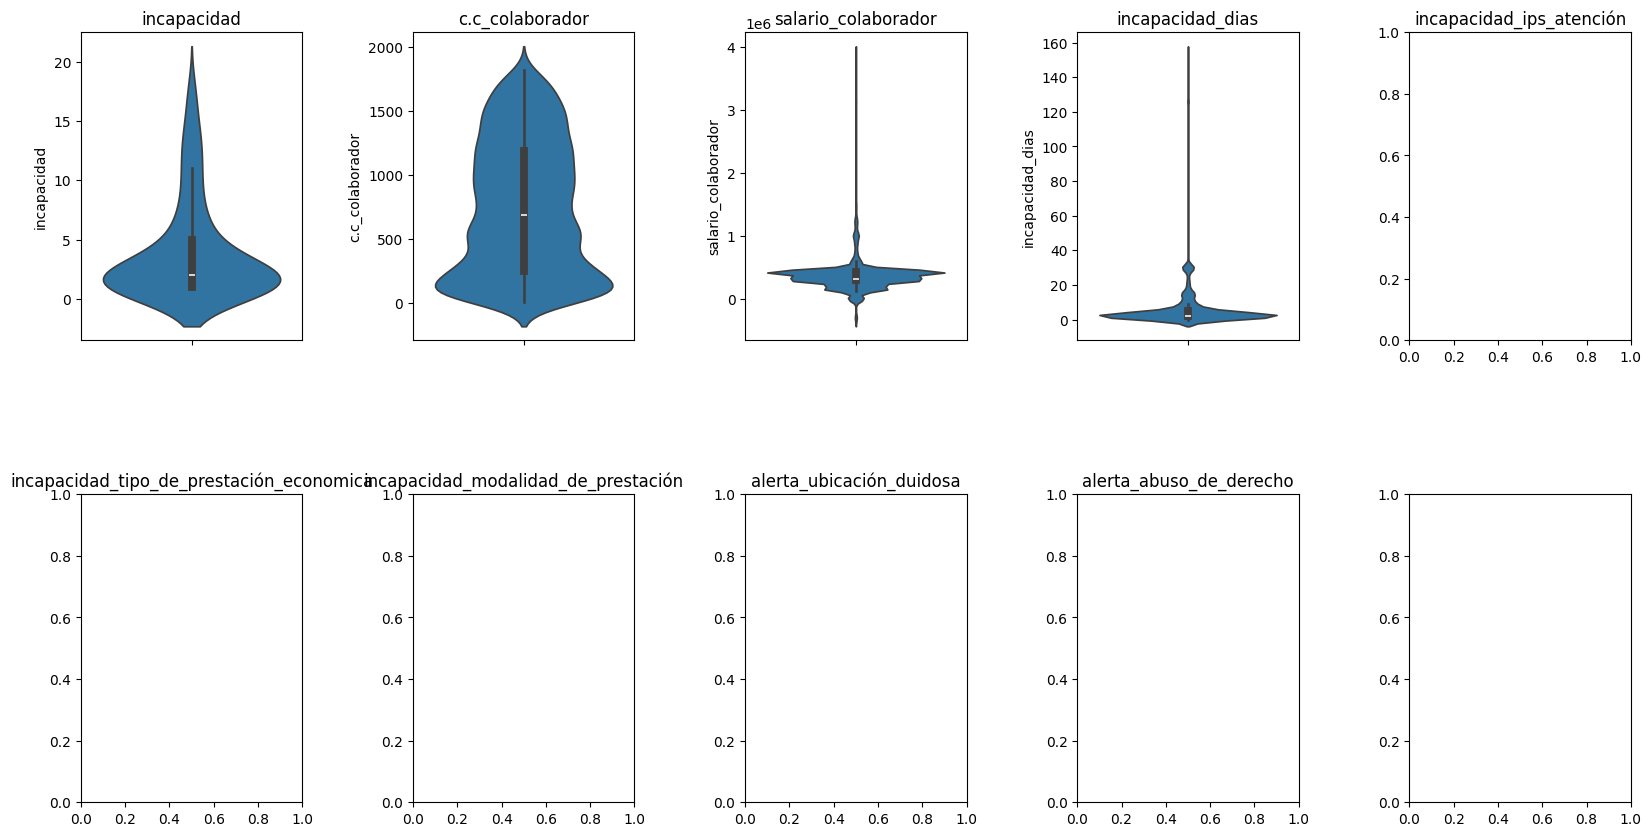

In [65]:
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
for i, var in enumerate(variables_numericas):
    ax = axes[i // 5, i % 5]
    sns.violinplot(y=df[var].dropna(), ax=ax)
    ax.set_title(var)

In [66]:
df[variables_numericas].describe().T[['mean', 'std', 'min', 'max']].sort_values('mean').style.background_gradient(cmap='coolwarm')

,mean,std,min,max
incapacidad,3.944444,4.193527,1.000000,18.000000
incapacidad_dias,5.808781,10.842523,0.000000,154.000000
c.c_colaborador,741.484588,522.741768,1.000000,1819.000000
salario_colaborador,366701.255468,250382.277239,-350000.000000,3927500.000000
incapacidad_ips_atención,nan,nan,nan,nan
incapacidad_tipo_de_prestación_economica,nan,nan,nan,nan
incapacidad_modalidad_de_prestación,nan,nan,nan,nan
alerta_ubicación_duidosa,nan,nan,nan,nan
alerta_abuso_de_derecho,nan,nan,nan,nan


## Limpieza general

In [67]:
# valores duplicados
print(df.duplicated().sum())
# eliminar duplicados
df = df.drop_duplicates()

0


In [68]:
# columnas con un 90% de valores nulos
print(df.isnull().mean().sort_values(ascending=False).head(10))
# eliminar columnas con un 90% de valores nulos
print(f"Columnas antes de eliminar: {df.shape[1]}")
print(f"Columnas después de eliminar: {df.dropna(thresh=len(df) * 0.9, axis=1).shape[1]}")
print(f"Columnas eliminadas: {list(df.columns.difference(df.dropna(thresh=len(df) * 0.9, axis=1).columns))}")
df = df.dropna(thresh=len(df) * 0.9, axis=1)

incapacidad_ips_atención                    1.000000
alerta_abuso_de_derecho                     1.000000
incapacidad_modalidad_de_prestación         1.000000
incapacidad_tipo_de_prestación_economica    1.000000
alerta_ubicación_duidosa                    1.000000
incapacidad                                 0.980645
fecha_de_ingreso_eps                        0.872401
salario_colaborador                         0.000358
incapacidad_fecha_de_inicio                 0.000179
incapacidad_dias                            0.000000
dtype: float64
Columnas antes de eliminar: 25
Columnas después de eliminar: 18
Columnas eliminadas: ['alerta_abuso_de_derecho', 'alerta_ubicación_duidosa', 'fecha_de_ingreso_eps', 'incapacidad', 'incapacidad_ips_atención', 'incapacidad_modalidad_de_prestación', 'incapacidad_tipo_de_prestación_economica']


# Generacion de informacion

In [71]:
import pandas as pd

# Asegurar formato correcto de columnas
df['incapacidad_fecha_de_inicio'] = pd.to_datetime(df['incapacidad_fecha_de_inicio'])
df['salario_colaborador'] = pd.to_numeric(df['salario_colaborador'], errors='coerce')
df['incapacidad_dias'] = pd.to_numeric(df['incapacidad_dias'], errors='coerce')

# 1. Fecha fin de la incapacidad
df['fecha_fin_incapacidad'] = df['incapacidad_fecha_de_inicio'] + pd.to_timedelta(df['incapacidad_dias'], unit='D')

# 2. Costo total estimado de la incapacidad
df['costo_total_incapacidad'] = (df['salario_colaborador'] / 30) * df['incapacidad_dias']

# 3. Incapacidades acumuladas por colaborador
df['incapacidades_acumuladas_por_colaborador'] = df.groupby('c.c_colaborador')['c.c_colaborador'].transform('count')

# 4. Días acumulados por colaborador
df['dias_acumulados_por_colaborador'] = df.groupby('c.c_colaborador')['incapacidad_dias'].transform('sum')

# 5. Mes y año de la incapacidad
df['mes'] = df['incapacidad_fecha_de_inicio'].dt.month
df['año'] = df['incapacidad_fecha_de_inicio'].dt.year

# 6. Incapacidades por mes y año
df['incapacidades_por_mes'] = df.groupby(['año', 'mes'])['c.c_colaborador'].transform('count')

# 7. Días promedio por incapacidad por colaborador
df['dias_promedio_por_incapacidad_colaborador'] = (
    df['dias_acumulados_por_colaborador'] / df['incapacidades_acumuladas_por_colaborador']
)


In [72]:
# exportar el dataframe limpio
df.to_csv(r'../data/processed/Incapacidades_Empresa_limpio.csv', index=False)
